## Introduction

<p> The datasets now made available were collected aiming at the development of prediction models to classify a hotel booking׳s likelihood to be canceled. <br>
Nevertheless, due to the characteristics of the variables included in these datasets, their use goes beyond this cancellation prediction problem. <br>
One of the most important properties in data for prediction models is not to promote leakage of future information. <br> In order to prevent this from happening, the timestamp of the target variable must occur after the input variables’ timestamp. <br> Thus, instead of directly extracting variables from the bookings database table, when available, the variables’ values were extracted from the bookings change log, <br> with a timestamp relative to the day prior to arrival date (for all the bookings created before their arrival date). </p>

### Libraries

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
style.use('seaborn-poster')
style.use('ggplot')
import plotly.express as px
import seaborn as sn

# Algorithms
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier)
from sklearn.neural_network import MLPClassifier

from xgboost import plot_tree
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from time import time
from time import sleep
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score

# RNN
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from tensorflow.keras.layers import  Dense,  BatchNormalization, Dropout, Flatten
from tensorflow.keras.models import Sequential, load_model
from keras import backend as K
from keras.optimizers import Adam, SGD


#Shap & Eli5
import shap
import eli5 as eli


#Categories
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

In [2]:
matplotlib.style.use('seaborn-poster')
matplotlib.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'

In [3]:
df = pd.read_csv('hotel_bookings.csv')
df = df.reindex(sorted(df.columns), axis = 1)
df

adr  adults  agent  arrival_date_day_of_month arrival_date_month  \
0         0.00       2    NaN                          1               July   
1         0.00       2    NaN                          1               July   
2        75.00       1    NaN                          1               July   
3        75.00       1  304.0                          1               July   
4        98.00       2  240.0                          1               July   
...        ...     ...    ...                        ...                ...   
119385   96.14       2  394.0                         30             August   
119386  225.43       3    9.0                         31             August   
119387  157.71       2    9.0                         31             August   
119388  104.40       2   89.0                         31             August   
119389  151.20       2    9.0                         29             August   

        arrival_date_week_number  arrival_date_year assigned_room_type  \
0                             27               2015                  C   
1                             27               2015                  C   
2                             27               2015                  C   
3                             27               2015                  A   
4                             27               2015                  A   
...                          ...                ...                ...   
119385                        35               2017                  A   
119386                        35               2017                  E   
119387                        35               2017                  D   
119388                        35               2017                  A   
119389                        35               2017                  A   

        babies  booking_changes  ...  meal  previous_bookings_not_canceled  \
0            0                3  ...    BB                               0   
1            0                4  ...    BB                               0   
2            0                0  ...    BB                               0   
3            0                0  ...    BB                               0   
4            0                0  ...    BB                               0   
...        ...              ...  ...   ...                             ...   
119385       0                0  ...    BB                               0   
119386       0                0  ...    BB                               0   
119387       0                0  ...    BB                               0   
119388       0                0  ...    BB                               0   
119389       0                0  ...    HB                               0   

       previous_cancellations required_car_parking_spaces  reservation_status  \
0                           0                           0           Check-Out   
1                           0                           0           Check-Out   
2                           0                           0           Check-Out   
3                           0                           0           Check-Out   
4                           0                           0           Check-Out   
...                       ...                         ...                 ...   
119385                      0                           0           Check-Out   
119386                      0                           0           Check-Out   
119387                      0                           0           Check-Out   
119388                      0                           0           Check-Out   
119389                      0                           0           Check-Out   

       reservation_status_date reserved_room_type stays_in_week_nights  \
0                   2015-07-01                  C                    0   
1                   2015-07-01                  C                    0   
2                   2015-07-02           

<ul>
  <li>adr: Average Daily Rate </li>
  <li>agent: ID of travel agency</li>
  <li>DaysInWaitingList: Number of days the booking was in the waiting list before it was confirmed to the customer</li>
  <li>DistributionChannel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”</li>
  <li>LeadTime: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date</li>
  <li>Meal: Undefined/SC – no meal package;
            BB – Bed & Breakfast;
HB – Half board (breakfast and one other meal – usually dinner);
FB – Full board (breakfast, lunch and dinner)</li>    
</ul>
<br>
<br>

<p>Company has the 94% of na values, I decide to remove it </p>

<AxesSubplot:xlabel='percentage', ylabel='column'>

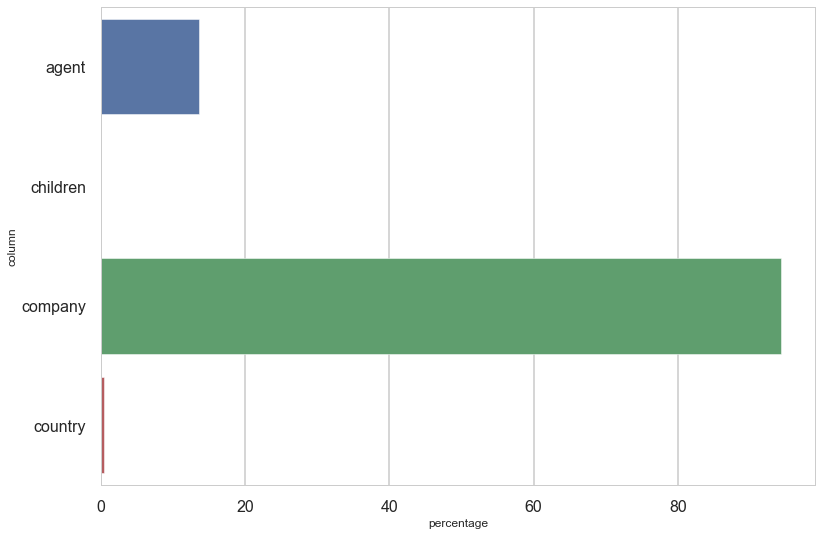

In [4]:
na=pd.DataFrame(df.isna().sum()/119390*100)
na.reset_index(inplace=True)
na.columns=["column","percentage"]
na=na[na["percentage"]!=0]
sns.set_style("whitegrid")
sns.barplot(x = na.percentage , y = na.column, palette = "deep")


In [5]:
del df['company']

In [6]:
na_cols = df.isna().any()
na_cols = na_cols[na_cols == True].reset_index()

na_cols = na_cols["index"].tolist()
for col in df.columns[1:]:
     if col in na_cols:
        if df[col].dtype != 'object':
             df[col] =  df[col].fillna(df[col].mean()).round(0)

In [7]:
df.isna().any()

adr                               False
adults                            False
agent                             False
arrival_date_day_of_month         False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_year                 False
assigned_room_type                False
babies                            False
booking_changes                   False
children                          False
country                            True
customer_type                     False
days_in_waiting_list              False
deposit_type                      False
distribution_channel              False
hotel                             False
is_canceled                       False
is_repeated_guest                 False
lead_time                         False
market_segment                    False
meal                              False
previous_bookings_not_canceled    False
previous_cancellations            False
required_car_parking_spaces       False


<p>Now, I remove the all na rows from the dataset </p>

In [8]:
df = df.dropna()
df.isna().sum()/119390*100

adr                               0.0
adults                            0.0
agent                             0.0
arrival_date_day_of_month         0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_year                 0.0
assigned_room_type                0.0
babies                            0.0
booking_changes                   0.0
children                          0.0
country                           0.0
customer_type                     0.0
days_in_waiting_list              0.0
deposit_type                      0.0
distribution_channel              0.0
hotel                             0.0
is_canceled                       0.0
is_repeated_guest                 0.0
lead_time                         0.0
market_segment                    0.0
meal                              0.0
previous_bookings_not_canceled    0.0
previous_cancellations            0.0
required_car_parking_spaces       0.0
reservation_status                0.0
reservation_

In [9]:
df.dtypes

adr                               float64
adults                              int64
agent                             float64
arrival_date_day_of_month           int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_year                   int64
assigned_room_type                 object
babies                              int64
booking_changes                     int64
children                          float64
country                            object
customer_type                      object
days_in_waiting_list                int64
deposit_type                       object
distribution_channel               object
hotel                              object
is_canceled                         int64
is_repeated_guest                   int64
lead_time                           int64
market_segment                     object
meal                               object
previous_bookings_not_canceled      int64
previous_cancellations            

### Plot Histogram of numeric Columns

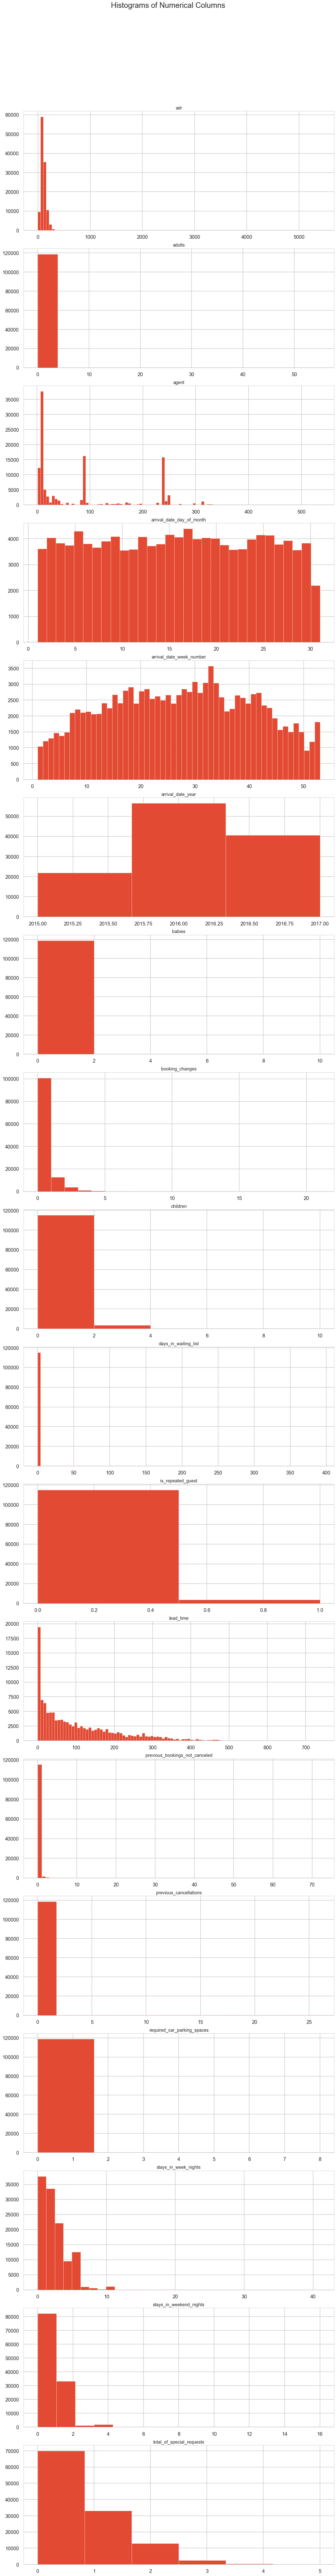

In [10]:
dataset2 = df[['adr', 'adults', 'agent', 'arrival_date_day_of_month',
       'arrival_date_week_number', 'arrival_date_year', 'babies',
        'booking_changes', 'children', 'days_in_waiting_list',
       'is_repeated_guest', 'lead_time', 'previous_bookings_not_canceled',
        'previous_cancellations','required_car_parking_spaces',
        'stays_in_week_nights','stays_in_weekend_nights','total_of_special_requests']]


    
fig = plt.figure(figsize=(15, 120))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment = "center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(18, 1, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

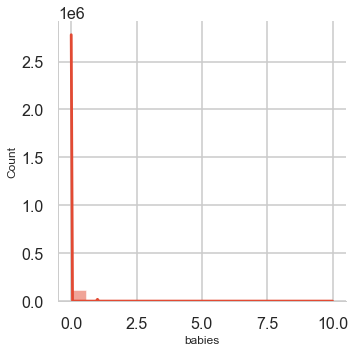

In [11]:
sns.displot(data=dataset2, x="babies", kde=True)

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


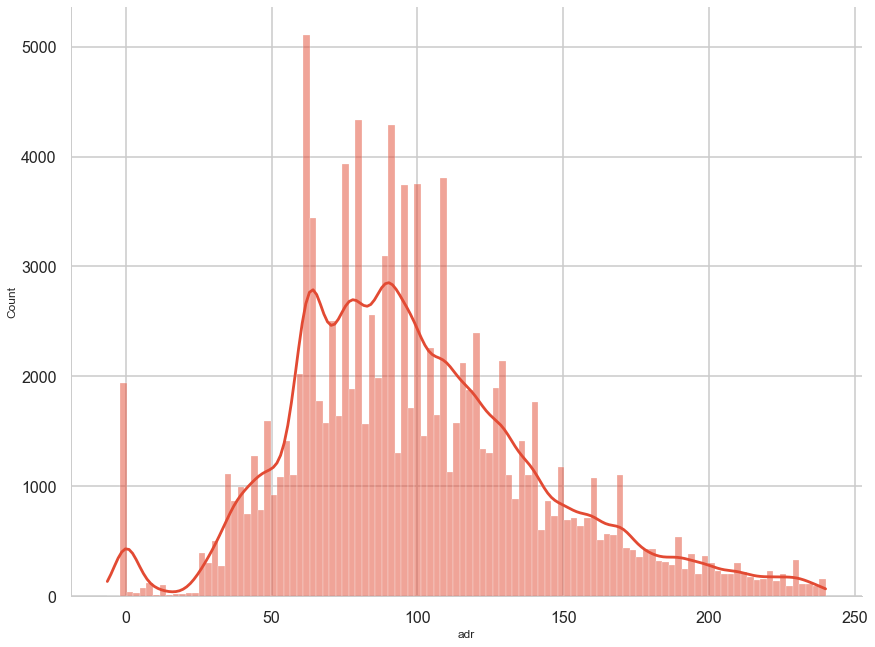

In [12]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh



# Append a few "bad" points
x = dataset2.adr

# Keep only the "good" points
# "~" operates as a logical not operator on boolean numpy arrays
filtered = x[~is_outlier(x)]

g=sns.displot( data=filtered, x=filtered, kde=True)
g.fig.set_size_inches(15,10)

In [18]:
from scipy.stats import zscore
z_scores = zscore(dataset2)


abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = dataset2[filtered_entries]

print(new_df)

           adr  adults  agent  arrival_date_day_of_month  \
2        75.00       1   87.0                          1   
3        75.00       1  304.0                          1   
4        98.00       2  240.0                          1   
5        98.00       2  240.0                          1   
6       107.00       2   87.0                          1   
...        ...     ...    ...                        ...   
119384   96.14       2  394.0                         30   
119385   96.14       2  394.0                         30   
119386  225.43       3    9.0                         31   
119388  104.40       2   89.0                         31   
119389  151.20       2    9.0                         29   

        arrival_date_week_number  arrival_date_year  babies  booking_changes  \
2                             27               2015       0                0   
3                             27               2015       0                0   
4                             27       

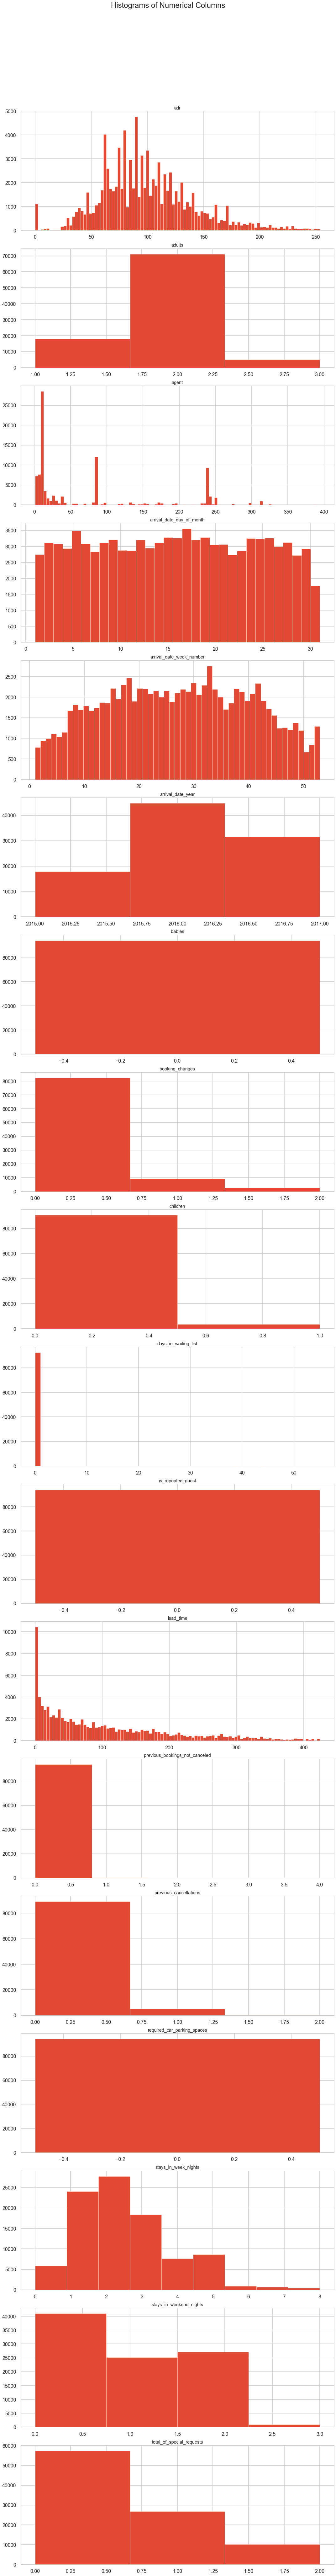

In [20]:
dataset2=new_df
    
fig = plt.figure(figsize=(15, 120))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment = "center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(18, 1, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [24]:
columns=['adr', 'adults', 'agent', 'arrival_date_day_of_month',
       'arrival_date_week_number', 'arrival_date_year', 'babies',
        'booking_changes', 'children', 'days_in_waiting_list',
       'is_repeated_guest', 'lead_time', 'previous_bookings_not_canceled',
        'previous_cancellations','required_car_parking_spaces',
        'stays_in_week_nights','stays_in_weekend_nights','total_of_special_requests']
df = df.drop(columns, axis=1)

In [26]:
result = pd.concat([df, dataset2], axis=1, join="inner")

In [29]:
result

arrival_date_month assigned_room_type country customer_type  \
2                    July                  C     GBR     Transient   
3                    July                  A     GBR     Transient   
4                    July                  A     GBR     Transient   
5                    July                  A     GBR     Transient   
6                    July                  C     PRT     Transient   
...                   ...                ...     ...           ...   
119384             August                  A     BEL     Transient   
119385             August                  A     BEL     Transient   
119386             August                  E     FRA     Transient   
119388             August                  A     GBR     Transient   
119389             August                  A     DEU     Transient   

       deposit_type distribution_channel         hotel  is_canceled  \
2        No Deposit               Direct  Resort Hotel            0   
3        No Deposit            Corporate  Resort Hotel            0   
4        No Deposit                TA/TO  Resort Hotel            0   
5        No Deposit                TA/TO  Resort Hotel            0   
6        No Deposit               Direct  Resort Hotel            0   
...             ...                  ...           ...          ...   
119384   No Deposit                TA/TO    City Hotel            0   
119385   No Deposit                TA/TO    City Hotel            0   
119386   No Deposit                TA/TO    City Hotel            0   
119388   No Deposit                TA/TO    City Hotel            0   
119389   No Deposit                TA/TO    City Hotel            0   

       market_segment meal  ... children days_in_waiting_list  \
2              Direct   BB  ...      0.0                    0   
3           Corporate   BB  ...      0.0                    0   
4           Online TA   BB  ...      0.0                    0   
5           Online TA   BB  ...      0.0                    0   
6              Direct   BB  ...      0.0                    0   
...               ...  ...  ...      ...                  ...   
119384  Offline TA/TO   BB  ...      0.0                    0   
119385  Offline TA/TO   BB  ...      0.0                    0   
119386      Online TA   BB  ...      0.0                    0   
119388      Online TA   BB  ...      0.0                    0   
119389      Online TA   HB  ...      0.0                    0   

       is_repeated_guest  lead_time  previous_bookings_not_canceled  \
2                      0          7                               0   
3                      0         13                               0   
4                      0         14                               0   
5                      0         14                               0   
6                      0          0                               0   
...                  ...        ...                             ...   
119384                 0         21                               0   
119385                 0         23                               0   
119386                 0        102                               0   
119388                 0        109                               0   
119389                 0        205                               0   

        previous_cancellations  required_car_parking_spaces  \
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   
6                            0                            0   
...                        ...                          ...   
119384                       0                            0   
119385                       0                            0   
119386                       0                            0   
119388                       0                   

In [31]:
df=result

In [32]:
df.reset_index(inplace = True)

In [34]:
df.head()

index arrival_date_month assigned_room_type country customer_type  \
0      2               July                  C     GBR     Transient   
1      3               July                  A     GBR     Transient   
2      4               July                  A     GBR     Transient   
3      5               July                  A     GBR     Transient   
4      6               July                  C     PRT     Transient   

  deposit_type distribution_channel         hotel  is_canceled market_segment  \
0   No Deposit               Direct  Resort Hotel            0         Direct   
1   No Deposit            Corporate  Resort Hotel            0      Corporate   
2   No Deposit                TA/TO  Resort Hotel            0      Online TA   
3   No Deposit                TA/TO  Resort Hotel            0      Online TA   
4   No Deposit               Direct  Resort Hotel            0         Direct   

   ... children days_in_waiting_list is_repeated_guest lead_time  \
0  ...      0.0                    0                 0         7   
1  ...      0.0                    0                 0        13   
2  ...      0.0                    0                 0        14   
3  ...      0.0                    0                 0        14   
4  ...      0.0                    0                 0         0   

   previous_bookings_not_canceled  previous_cancellations  \
0                               0                       0   
1                               0                       0   
2                               0                       0   
3                               0                       0   
4                               0                       0   

   required_car_parking_spaces  stays_in_week_nights  stays_in_weekend_nights  \
0                            0                     1                        0   
1                            0                     1                        0   
2                            0                     2                        0   
3                            0                     2                        0   
4                            0                     2                        0   

   total_of_special_requests  
0                          0  
1                          0  
2                          1  
3                          1  
4                          0  

[5 rows x 32 columns]

### Overall Cancelletion  Rate


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


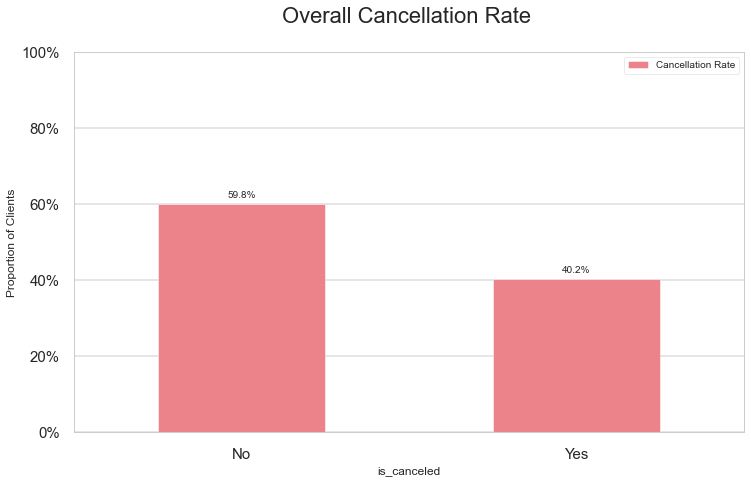

In [35]:
import matplotlib.ticker as mtick
rate = df[["is_canceled", "index"]]
rate ["is_canceled"] = pd.Series(np.where((rate["is_canceled"] == 0), "No", "Yes"))
sectors = rate .groupby ("is_canceled")
rate = pd.DataFrame(sectors["index"].count())
rate ["Cancellation Rate"] = (rate ["index"] / sum(rate ["index"]) )*100
ax =  rate[["Cancellation Rate"]].plot.bar(title = 'Overall Cancellation Rate', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color = '#ec838a', fontsize = 15, stacked=False, ylim =(0,100))
plt.grid(color="black", axis="y", linewidth=0.2)
plt.ylabel('Proportion of Clients',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('is_canceled',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Cancellation Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(rate[["index"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        
        label = "{:.1f}%".format(y_value)    
        ax.annotate(
            label,                      
            (x_value, y_value),        
            xytext=(0, space),         
            textcoords="offset points", 
            ha='center',                
            va=va)                                                            
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False) 

<p> Correlation from variables, We don't see any tipe of significant correlation</p>

In [36]:
df.corr()

index  is_canceled       adr    adults  \
index                           1.000000    -0.300228  0.208669  0.006451   
is_canceled                    -0.300228     1.000000  0.063025  0.054312   
adr                             0.208669     0.063025  1.000000  0.267462   
adults                          0.006451     0.054312  0.267462  1.000000   
agent                          -0.576031    -0.039716 -0.085730 -0.063088   
arrival_date_day_of_month       0.011266    -0.001042  0.025218  0.000407   
arrival_date_week_number       -0.058025     0.005079  0.074007  0.016250   
arrival_date_year               0.315582     0.025670  0.225353  0.057474   
babies                               NaN          NaN       NaN       NaN   
booking_changes                 0.011050    -0.156387  0.000242 -0.080635   
children                        0.016985    -0.009831  0.161338  0.061322   
days_in_waiting_list            0.018905     0.096117 -0.013317 -0.054253   
is_repeated_guest                    NaN          NaN       NaN       NaN   
lead_time                      -0.010048     0.273384 -0.066721  0.118631   
previous_bookings_not_canceled -0.031837    -0.036409 -0.040326 -0.048568   
previous_cancellations          0.055444     0.290084 -0.122768 -0.009507   
required_car_parking_spaces          NaN          NaN       NaN       NaN   
stays_in_week_nights           -0.183261     0.015768  0.075235  0.131408   
stays_in_weekend_nights        -0.109850    -0.009823  0.035347  0.112565   
total_of_special_requests       0.112804    -0.232179  0.174497  0.166615   

                                   agent  arrival_date_day_of_month  \
index                          -0.576031                   0.011266   
is_canceled                    -0.039716                  -0.001042   
adr                            -0.085730                   0.025218   
adults                         -0.063088                   0.000407   
agent                           1.000000                   0.000914   
arrival_date_day_of_month       0.000914                   1.000000   
arrival_date_week_number       -0.032932                   0.056956   
arrival_date_year               0.029273                  -0.000287   
babies                               NaN                        NaN   
booking_changes                 0.054901                   0.010585   
children                       -0.008661                   0.013069   
days_in_waiting_list           -0.045399                   0.034665   
is_repeated_guest                    NaN                        NaN   
lead_time                      -0.062114                   0.006267   
previous_bookings_not_canceled  0.013564                   0.003708   
previous_cancellations         -0.110985                  -0.000641   
required_car_parking_spaces          NaN                        NaN   
stays_in_week_nights            0.146233                  -0.011659   
stays_in_weekend_nights         0.078508                   0.005514   
total_of_special_requests       0.021069                   0.001578   

                                arrival_date_week_number  arrival_date_year  \
index                                          -0.058025           0.315582   
is_canceled                                     0.005079           0.025670   
adr                                             0.074007           0.225353   
adults                                          0.016250           0.057474   
agent                                          -0.032932           0.029273   
arrival_date_day_of_month                       0.056956          -0.000287   
arrival_date_week_number                        1.000000          -0.547513   
arrival_date_year                              -0.547513           1.000000   
babies                                               NaN                NaN   
booking_changes                                 0.002302           0.020942   
children                                        0.003204

<AxesSubplot:>

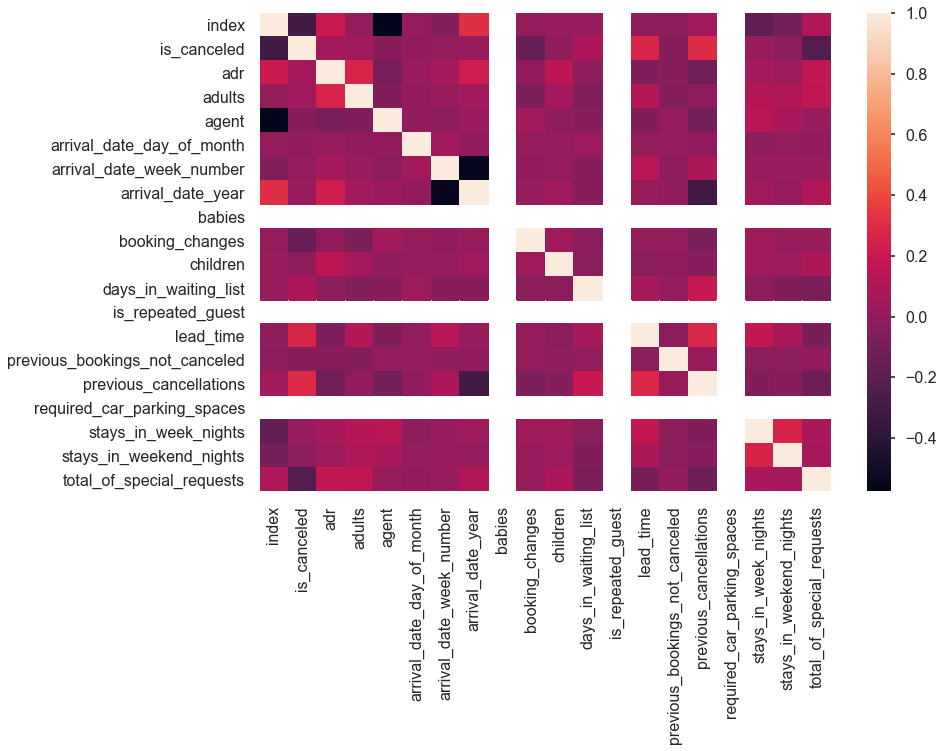

In [37]:
sns.heatmap(df.corr(), 
        xticklabels = df.corr().columns,
        yticklabels = df.corr().columns)

## Feature Engineering and EDA

<p> Canculation of the number of cancellation per day </p>

In [38]:
df_canceled = df.copy()

In [39]:
df_canceled['datetime'] = pd.to_datetime(df_canceled['arrival_date_year'].map(str) + " " + df_canceled['arrival_date_month'].map(str) + " " + df_canceled['arrival_date_day_of_month'].map(str))
df['datetime'] = pd.to_datetime(df['arrival_date_year'].map(str) + " " + df['arrival_date_month'].map(str) + " " + df['arrival_date_day_of_month'].map(str))
del df['arrival_date_year']
del df['arrival_date_month']
del df['arrival_date_day_of_month']

In [40]:
df_canceled = df_canceled[df_canceled['is_canceled'] == 1]

In [41]:
df_canceled = pd.DataFrame(df_canceled.groupby('datetime').count()['is_canceled'])

In [42]:
df_canceled.reset_index(inplace = True)

In [43]:
df_canceled.columns = ['datetime', 'number_of_cancellation']

In [44]:
df = df_canceled.merge(df)

<p> Total number of people in family </p>

In [45]:
df['family'] = df['adults'] + df['babies'] + df['children']


In [46]:
#Drop rows where family = 0 -> no guests

df = df.drop(df[df['family'] == 0].index)

In [47]:
df.head()

datetime  number_of_cancellation  index assigned_room_type country  \
0 2015-07-01                      17      2                  C     GBR   
1 2015-07-01                      17      3                  A     GBR   
2 2015-07-01                      17      4                  A     GBR   
3 2015-07-01                      17      5                  A     GBR   
4 2015-07-01                      17      6                  C     PRT   

  customer_type deposit_type distribution_channel         hotel  is_canceled  \
0     Transient   No Deposit               Direct  Resort Hotel            0   
1     Transient   No Deposit            Corporate  Resort Hotel            0   
2     Transient   No Deposit                TA/TO  Resort Hotel            0   
3     Transient   No Deposit                TA/TO  Resort Hotel            0   
4     Transient   No Deposit               Direct  Resort Hotel            0   

   ... days_in_waiting_list is_repeated_guest lead_time  \
0  ...                    0                 0         7   
1  ...                    0                 0        13   
2  ...                    0                 0        14   
3  ...                    0                 0        14   
4  ...                    0                 0         0   

  previous_bookings_not_canceled previous_cancellations  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   required_car_parking_spaces  stays_in_week_nights  stays_in_weekend_nights  \
0                            0                     1                        0   
1                            0                     1                        0   
2                            0                     2                        0   
3                            0                     2                        0   
4                            0                     2                        0   

   total_of_special_requests  family  
0                          0     1.0  
1                          0     1.0  
2                          1     2.0  
3                          1     2.0  
4                          0     2.0  

[5 rows x 32 columns]

In [49]:
sns.boxplot(df, palette="deep")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<p> Balance of target class </p>

In [50]:
df.is_canceled

0        0
1        0
2        0
3        0
4        0
        ..
94210    0
94211    0
94212    0
94213    0
94214    0
Name: is_canceled, Length: 94215, dtype: int64

<p> Distribution of adr </p>

In [51]:
df[df['adr'] == 0]['is_canceled']

30       0
314      0
315      0
375      0
376      0
        ..
92488    0
92653    0
93048    0
93748    0
94017    0
Name: is_canceled, Length: 1087, dtype: int64

In [52]:
df['normalized_adr'] = (df['adr'] - min(df['adr'])) / (max(df['adr']) - min(df['adr'])) * 100
df['normalized_adr']

0        29.605653
1        29.605653
2        38.684720
3        38.684720
4        42.237398
           ...    
94210    55.559942
94211    39.079462
94212    34.579402
94213    88.986697
94214    41.211069
Name: normalized_adr, Length: 94215, dtype: float64

<p> Distribution of people for country </p>

In [53]:
df.country

0        GBR
1        GBR
2        GBR
3        GBR
4        PRT
        ... 
94210    DEU
94211    DEU
94212    DEU
94213    FRA
94214    GBR
Name: country, Length: 94215, dtype: object

In [54]:
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
total_guests = country_data["country"].sum()
country_data["%_guests"] = round(country_data["country"] / total_guests * 100, 2)
country_data["country"] = country_data.index

In [55]:
country_data

country  %_guests
PRT     PRT     24.81
GBR     GBR     13.03
FRA     FRA     12.33
DEU     DEU      9.35
ESP     ESP      8.05
..      ...       ...
MDG     MDG      0.00
NAM     NAM      0.00
SYC     SYC      0.00
HKG     HKG      0.00
BFA     BFA      0.00

[159 rows x 2 columns]

In [56]:
guest_map = px.choropleth(country_data,
                    locations = country_data.index,
                    color = country_data["%_guests"], 
                    hover_name = country_data.index, 
                    color_continuous_scale = px.colors.sequential.Plasma,
                    title = "Home country of guests")
guest_map.show()

<p> How much did they pay? </p>

In [57]:
df.groupby(['hotel', 'assigned_room_type']).mean()['adr']

hotel         assigned_room_type
City Hotel    A                      97.570588
              B                      94.518309
              C                     106.422929
              D                     121.911608
              E                     143.965608
              F                     149.969943
              G                     153.135019
              K                      86.883465
Resort Hotel  A                      79.860856
              B                     102.348957
              C                      89.434693
              D                      86.287155
              E                     103.955144
              F                     112.568622
              G                     124.581593
              H                     145.149167
              I                      34.006667
              L                       8.000000
Name: adr, dtype: float64

In [58]:
df = df[df['adr'] >= 0]

<AxesSubplot:xlabel='datetime', ylabel='adr'>

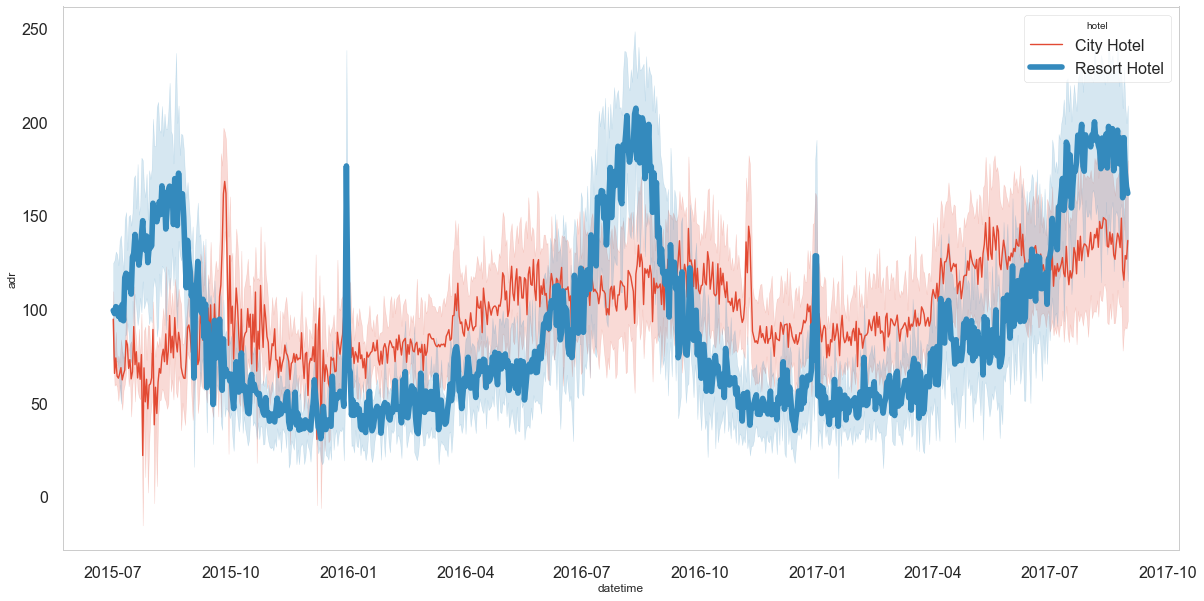

In [59]:
df['arrival_date_month'] = pd.Categorical(df['datetime'], categories = months, ordered = True)
room_prices_mothly = df[["hotel", "datetime", "adr"]].sort_values("datetime")

plt.figure(figsize=(20, 10))
plt.grid(color="black", linewidth=0.2)
sns.lineplot(x = "datetime", y = "adr", hue = "hotel", data = room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci = "sd", size = "hotel")

<p> Type of meal </p>

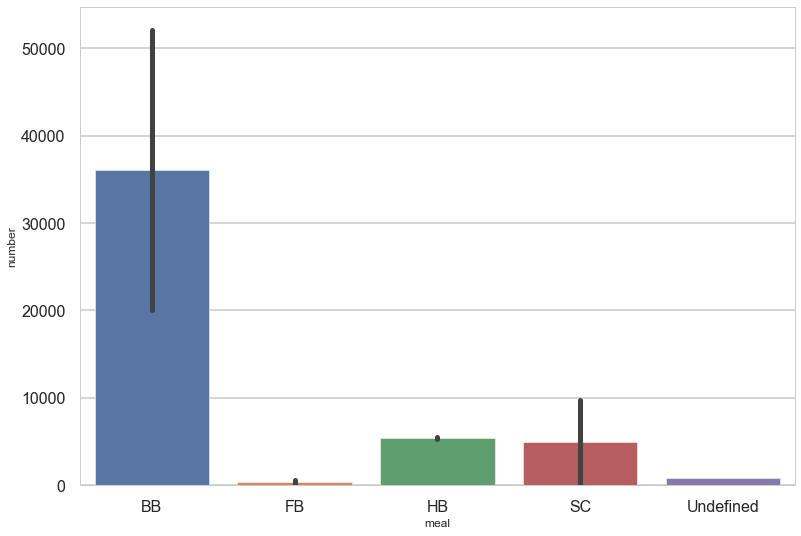

In [60]:
meal_frame = pd.DataFrame(df.groupby(['hotel', 'meal']).count()['index'])
meal_frame = meal_frame.reset_index()
meal_frame.columns = ['hotel', 'meal', 'number']
sns.barplot(x = meal_frame.meal , y = meal_frame.number, palette = "deep")
sns.set_style("darkgrid")

<p> Most important variables in case of cancellation </p>

<AxesSubplot:xlabel='correlation_grade', ylabel='column'>

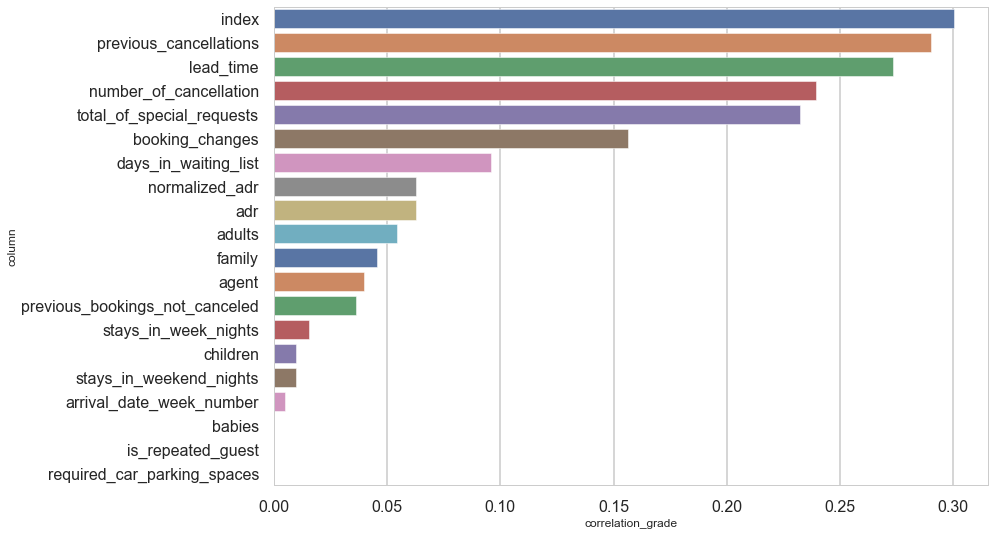

In [61]:
cancel_corr = df.corr()["is_canceled"]
cancel_corr=cancel_corr.abs().sort_values(ascending=False)[1:]
cancel_corr=pd.DataFrame(cancel_corr)
cancel_corr.reset_index(inplace=True)
cancel_corr.columns=["column","correlation_grade"]
cancel_corr=cancel_corr[cancel_corr["correlation_grade"]!=0]
sns.set_style("whitegrid")
sns.barplot(x = cancel_corr.correlation_grade , y = cancel_corr.column, palette = "deep")


## Models

<p> Remove insignificant variables and transform objects variables into dummy variables </p>

In [62]:
del df['customer_type']
del df['deposit_type']
del df['distribution_channel']
del df['market_segment']
del df['reservation_status']
del df['reservation_status_date']
del df['arrival_date_month']

In [63]:
df = pd.get_dummies(df)
df

datetime  number_of_cancellation   index  is_canceled     adr  adults  \
0     2015-07-01                      17       2            0   75.00       1   
1     2015-07-01                      17       3            0   75.00       1   
2     2015-07-01                      17       4            0   98.00       2   
3     2015-07-01                      17       5            0   98.00       2   
4     2015-07-01                      17       6            0  107.00       2   
...          ...                     ...     ...          ...     ...     ...   
94210 2017-08-31                      37  119380            0  140.75       2   
94211 2017-08-31                      37  119381            0   99.00       2   
94212 2017-08-31                      37  119383            0   87.60       2   
94213 2017-08-31                      37  119386            0  225.43       3   
94214 2017-08-31                      37  119388            0  104.40       2   

       agent  arrival_date_week_number  babies  booking_changes  ...  \
0       87.0                        27       0                0  ...   
1      304.0                        27       0                0  ...   
2      240.0                        27       0                0  ...   
3      240.0                        27       0                0  ...   
4       87.0                        27       0                0  ...   
...      ...                       ...     ...              ...  ...   
94210    9.0                        35       0                0  ...   
94211   14.0                        35       0                0  ...   
94212   42.0                        35       0                0  ...   
94213    9.0                        35       0                0  ...   
94214   89.0                        35       0                0  ...   

       meal_Undefined  reserved_room_type_A  reserved_room_type_B  \
0                   0                     1                     0   
1                   0                     1                     0   
2                   0                     1                     0   
3                   0                     1                     0   
4                   0                     0                     0   
...               ...                   ...                   ...   
94210               0                     1                     0   
94211               0                     1                     0   
94212               0                     1                     0   
94213               0                     0                     0   
94214               0                     1                     0   

       reserved_room_type_C  reserved_room_type_D  reserved_room_type_E  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         1                     0                     0   
...                     ...                   ...                   ...   
94210                     0                     0                     0   
94211                     0                     0                     0   
94212                     0                     0                     0   
94213                     0                     0                     1   
94214                     0                     0                     0   

       reserved_room_type_F  reserved_room_type_G  reserved_room_type_H  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                

In [64]:
del df['index']

<p> Prepare dataset for models </p>

In [65]:
X = df.copy() # Features
del X['is_canceled']
del X['datetime']
y = df.is_canceled # Target variable

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
print(X_train.shape, y_train.shape)

(75372, 218) (75372,)


### Feature Scaling

In [67]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [68]:
X_train.head()

number_of_cancellation       adr    adults     agent  \
54929               -0.903083 -0.227444 -1.810052 -0.741643   
24248               -1.088230 -2.398939  0.287764  0.111542   
27066               -0.185637  0.134472  2.385579 -0.509913   
82835                0.716956 -0.661743  0.287764  0.111542   
51928                0.369805 -0.227444  0.287764 -0.341383   

       arrival_date_week_number  babies  booking_changes  children  \
54929                  1.255006     0.0         1.939926 -0.198274   
24248                 -1.108092     0.0        -0.357769 -0.198274   
27066                 -0.886552     0.0        -0.357769 -0.198274   
82835                 -0.369624     0.0        -0.357769 -0.198274   
51928                  1.033466     0.0        -0.357769 -0.198274   

       days_in_waiting_list  is_repeated_guest  ...  meal_Undefined  \
54929             -0.126931                0.0  ...       -0.095769   
24248             -0.126931                0.0  ...       -0.095769   
27066             -0.126931                0.0  ...       -0.095769   
82835             -0.126931                0.0  ...       -0.095769   
51928             -0.126931                0.0  ...       -0.095769   

       reserved_room_type_A  reserved_room_type_B  reserved_room_type_C  \
54929              0.563683             -0.086907              -0.04684   
24248             -1.774047             -0.086907              -0.04684   
27066              0.563683             -0.086907              -0.04684   
82835              0.563683             -0.086907              -0.04684   
51928              0.563683             -0.086907              -0.04684   

       reserved_room_type_D  reserved_room_type_E  reserved_room_type_F  \
54929             -0.447705             -0.221171             -0.102590   
24248             -0.447705             -0.221171              9.747579   
27066             -0.447705             -0.221171             -0.102590   
82835             -0.447705             -0.221171             -0.102590   
51928             -0.447705             -0.221171             -0.102590   

       reserved_room_type_G  reserved_room_type_H  reserved_room_type_L  
54929             -0.068303             -0.052095             -0.008145  
24248             -0.068303             -0.052095             -0.008145  
27066             -0.068303             -0.052095             -0.008145  
82835             -0.068303             -0.052095             -0.008145  
51928             -0.068303             -0.052095             -0.008145  

[5 rows x 218 columns]

C:\Users\GIO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='number_of_cancellation', ylabel='Density'>

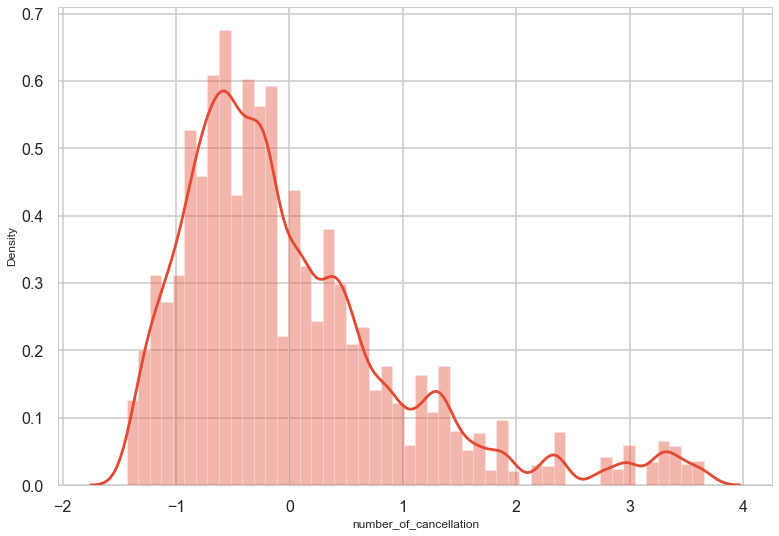

In [69]:
#sns.relplot(data=X_train,y="arrival_date_week_number" , x="adr")
#sns.rugplot(data=X_train, y="arrival_date_week_number" , x="adr")
sns.distplot(X_train.number_of_cancellation, kde=True)

<p> List of models </p>

In [70]:
dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

xgb = XGBClassifier(use_label_encoder = False, eval_metric = "logloss")

lgbm = LGBMClassifier()

ada = AdaBoostClassifier()

ex = ExtraTreeClassifier()

### First Evaluation of all models with Holdout method

In [72]:
# Training and testing all classifiers extracting accuracy, and run time.

classifiers = [dt, rf, xgb, lgbm, ada, ex]
classifier_name = ["DecisionTree", "Random Forest", "XtremeGradientBoosting", "LightGradientBoosting", "AdaBoost", "ExtraTreeClassifier"]
df_results = pd.DataFrame(columns = ['classifier', 'accuracy', 'run_time'])
i = 0
    
for classifier in classifiers:
    # Pipeline
    
    start_time = time()
    classifier.fit(X_train, y_train)
    run_time = time() - start_time
    
    # Test
    predicted = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predicted)
    df_results = df_results.append({'classifier': classifier_name[i], 'accuracy' : accuracy, 'run_time' : run_time}, ignore_index = True)   
    i += 1
    
df_results

classifier  accuracy   run_time
0            DecisionTree  0.837871   1.330574
1           Random Forest  0.874595  16.879112
2  XtremeGradientBoosting  0.858674   4.363519
3   LightGradientBoosting  0.848166   0.794141
4                AdaBoost  0.810858   8.214625
5     ExtraTreeClassifier  0.813777   0.354285

<p> Best model is XTremeGradient Boosting, based on the accuracy and the run time <br>
Shap help us to understand which value is very important for our model <br>
[Shap Explanation] https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d </p>

In [73]:
shap.initjs()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\GIO\\anaconda3\\lib\\site-packages\\shap\\plots\\resources\\bundle.js'

In [74]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)

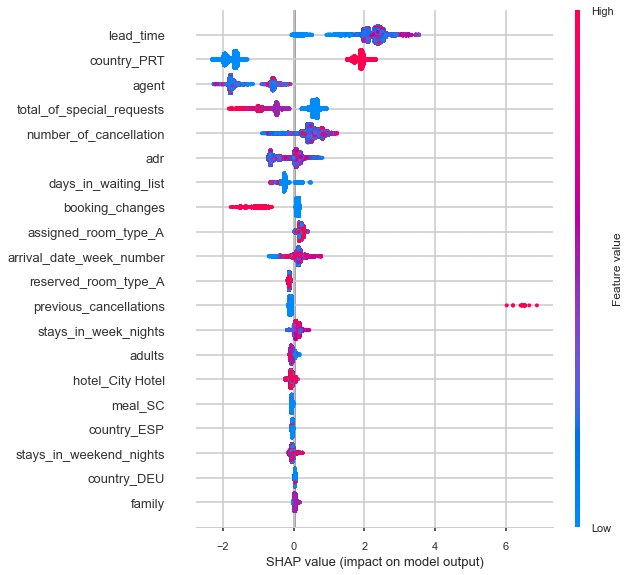

In [75]:
shap.summary_plot(shap_values, features = X, feature_names = X.columns)

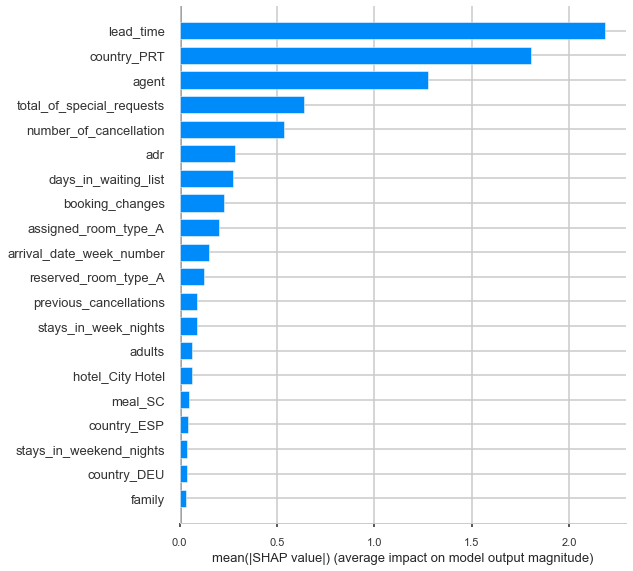

In [76]:
shap.summary_plot(shap_values, features = X, feature_names = X.columns, plot_type = 'bar')

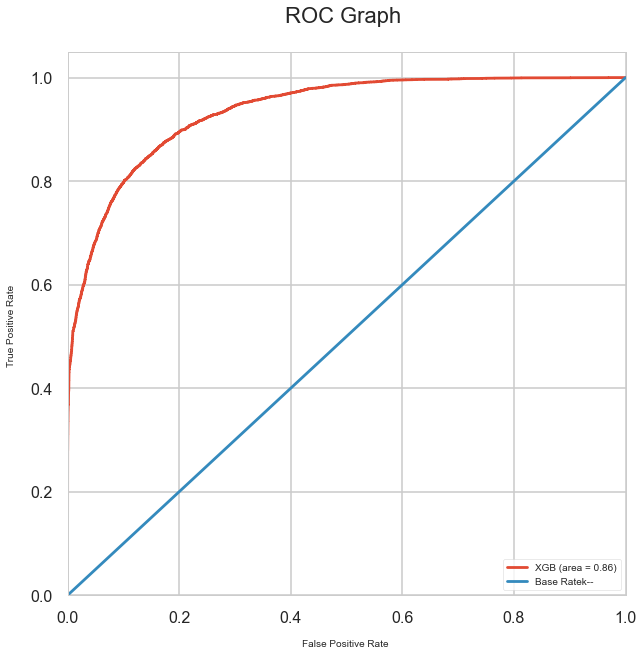

In [77]:
#Evaluate the model using ROC Graph

xgb.fit(X_train, y_train) 
# Predicting the Test set results 
y_pred = xgb.predict(X_test)
probs = xgb.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='XGB (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()

### Second Evaluation of all models with 5 CV

<p> We've decided to remove <b>Random Forest</b> and <b>AdaBoost</b> for an eccessive time of computation </p>

In [78]:
# Training and testing all classifiers extracting accuracy, and run time.
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5, random_state = 0)
classifiers = [dt, xgb, lgbm]
classifier_name = ["DecisionTree", "XtremeGradientBoosting", "LightGradientBoosting"]
df_results = pd.DataFrame(columns = ['classifier', 'accuracy', 'std', 'run_time'])
i = 0
    
for classifier in classifiers:
    
    # Test
    scores = cross_validate(classifier, X, y, cv = cv)
    run_time = scores['fit_time'] + scores['score_time']
    run_time = np.sum(run_time)
    accuracy = scores['test_score'].mean() 
    std = scores['test_score'].std()
    df_results = df_results.append({'classifier': classifier_name[i], 'accuracy' : accuracy, 'std' : std, 'run_time' : run_time}, ignore_index = True)   
    i += 1
    
df_results

classifier  accuracy       std    run_time
0            DecisionTree  0.840883  0.002333   32.290542
1  XtremeGradientBoosting  0.858373  0.002411  104.555825
2   LightGradientBoosting  0.851225  0.001902   16.757013

<p> Based on Accuracy and Run time we've decided to use XTreme Gradient Boosting </p>

In [79]:
xgb = XGBClassifier(use_label_encoder = False, eval_metric = "logloss")

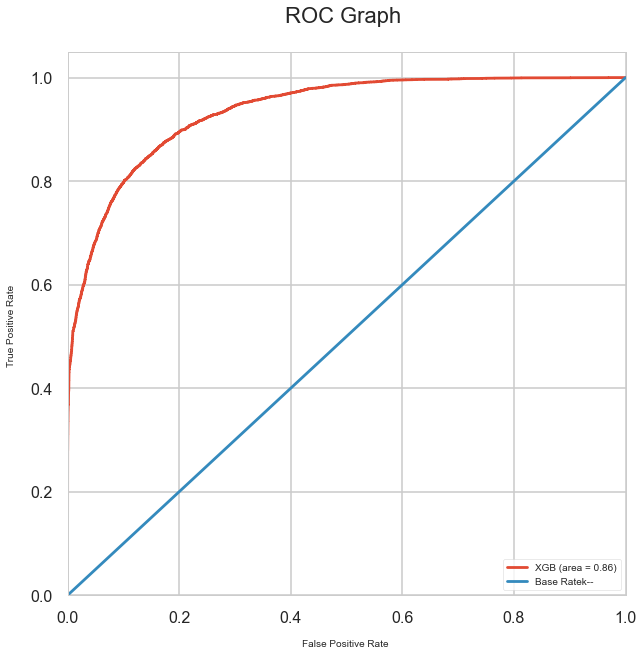

In [80]:
#Evaluate the model using ROC Graph

xgb.fit(X_train, y_train) 
# Predicting the Test set results 
y_pred = xgb.predict(X_test)
probs = xgb.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 10))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label = 'XGB (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc = "lower right", fontsize = "medium")
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.yticks(rotation = 0, horizontalalignment = "right")



plt.show()

Text(0.5, 45.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

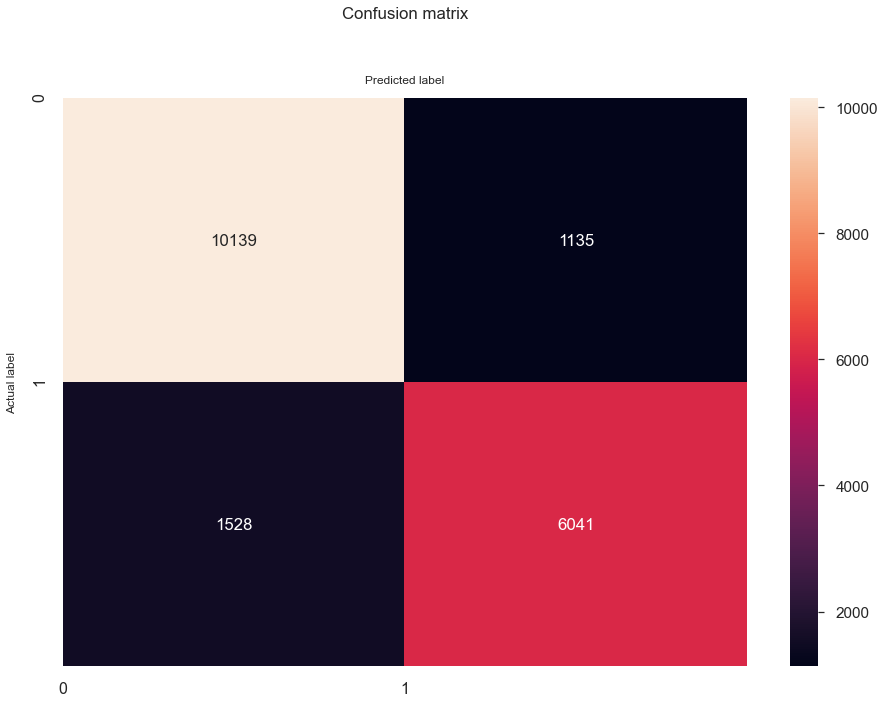

In [81]:
#Visualize results on a Confusion Matrix:
    
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

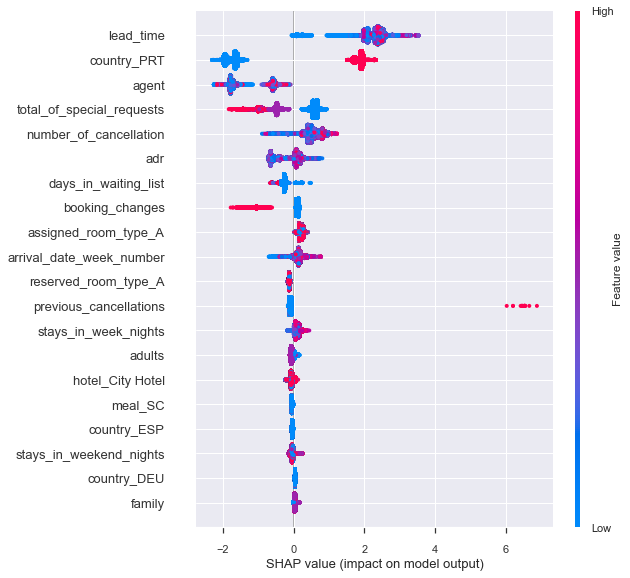

In [82]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, features = X, feature_names = X.columns)

### FIRST GridSearch on XTremeGradient Boosting

In [83]:
xgb_grid = XGBClassifier(tree_method = "hist",  use_label_encoder = False, eval_metric = "logloss", nthread = -1)
param_grid = {
            "n_estimators"     : range(100, 200, 10),
            "learning_rate"    : [0.05, 0.1, 0.3, 0.5],
            "max_depth"        : [3, 5, 7, 10, 12]
            }

cv = RepeatedStratifiedKFold(n_splits = 2, n_repeats = 1, random_state = 0)

grid = GridSearchCV(xgb_grid, param_grid = param_grid, verbose = 1, cv = cv)
start_time = time()
grid.fit(X, y)
run_time = time() - start_time
run_time

Fitting 2 folds for each of 200 candidates, totalling 400 fits


551.5198044776917

In [84]:
grid.best_params_

{'learning_rate': 0.3, 'max_depth': 12, 'n_estimators': 150}

In [95]:
xgb_grid1 = XGBClassifier(tree_method = "hist", use_label_encoder = False, eval_metric = "logloss", learning_rate = 0.3, max_depth = 12, 
                            n_estimators = 150, nthread = -1)

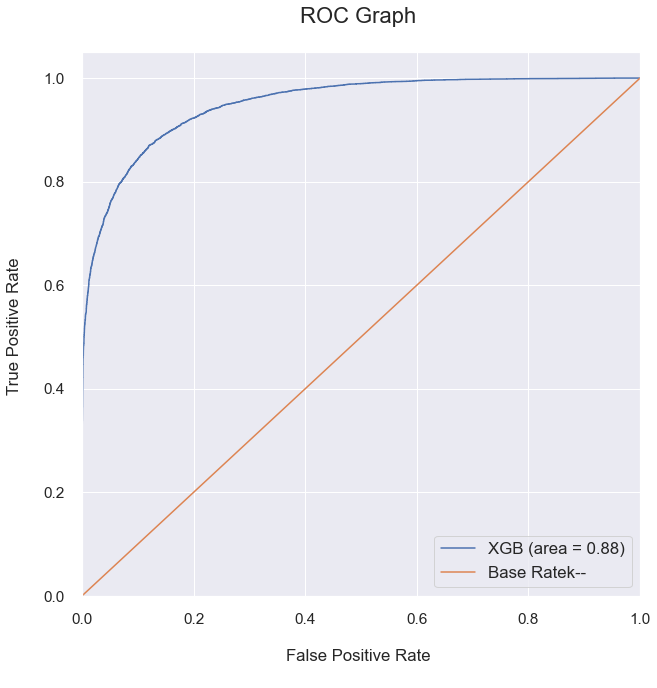

Run Time 2.5105252265930176
Accuracy: 0.8785225282598312


In [96]:
#Evaluate the model using ROC Graph

start_time = time()
xgb_grid1.fit(X_train, y_train) 
run_time = time() - start_time
# Predicting the Test set results 
y_pred = xgb_grid1.predict(X_test)
probs = xgb_grid1.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, xgb_grid1.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 10))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label = 'XGB (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc = "lower right", fontsize = "medium")
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.yticks(rotation = 0, horizontalalignment = "right")



plt.show()
print("Run Time", run_time)
print("Accuracy:", accuracy_score(y_test, y_pred))

<Figure size 2016x1440 with 0 Axes>

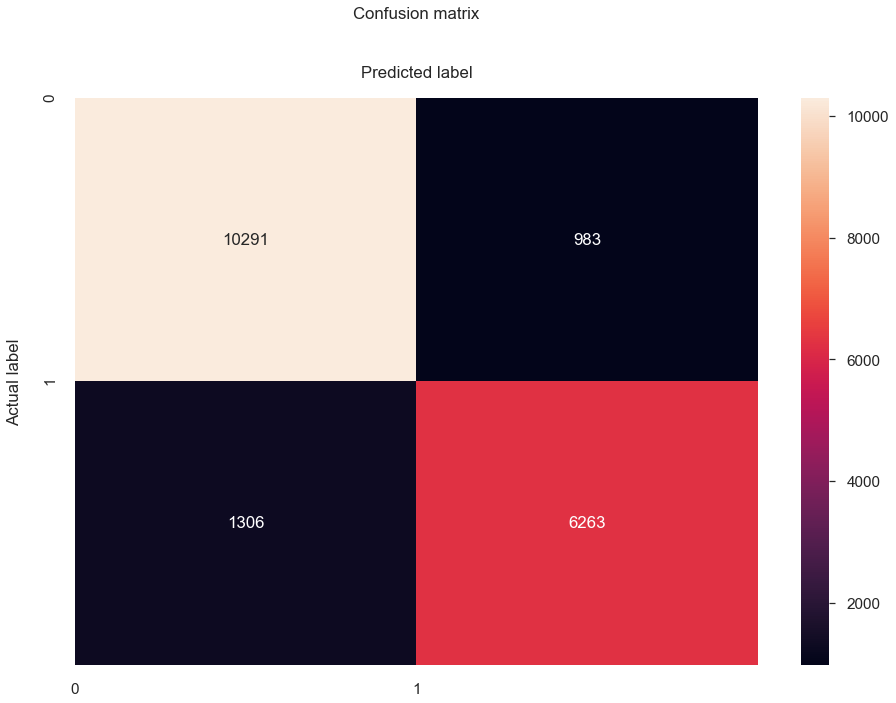

In [97]:
#Visualize results on a Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
accuracy = accuracy_score(y_test, y_pred)

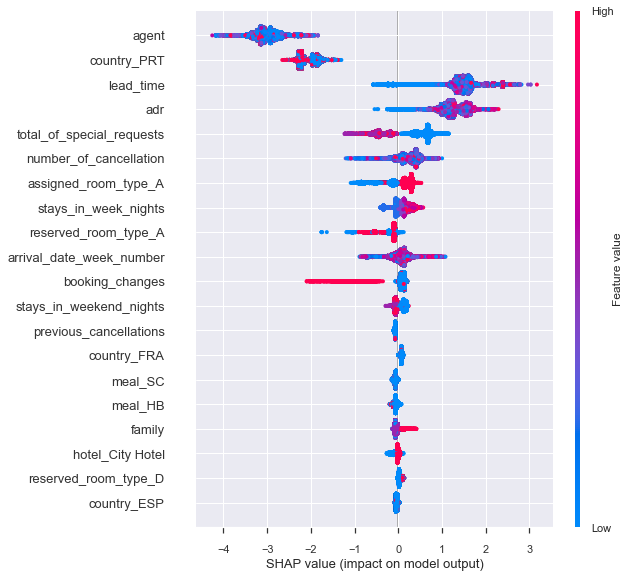

In [98]:
explainer = shap.TreeExplainer(xgb_grid1)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, features = X, feature_names = X.columns)

<p> Accuracy is increased from 0.87 to 0.89 with the GridSearch above, we've decided to improve the GridSearch with a second step of <br> Hyperparameter Tuning. <br>
 We've increased the number of estimators and we want to try to increase the depth of the model. <br>
 Furthermore we've decided to increase the Cross Validation value from 2 to 5</p>

### SECOND GridSearch on XTremeGradient Boosting

In [99]:
xgb_grid2 = XGBClassifier(tree_method = "hist", use_label_encoder = False, eval_metric = "logloss", nthread = -1,
                            learning_rate = 0.3, max_depth = 12, n_estimators = 190)
param_grid = {
            'colsample_bytree': [0.7, 0.8],
            'reg_alpha': [1.1, 1.2, 1.3],
            'reg_lambda': [1.1, 1.2, 1.3],
            }

cv = RepeatedStratifiedKFold(n_splits = 2, n_repeats = 1, random_state = 0)

grid2 = GridSearchCV(xgb_grid2, param_grid = param_grid, verbose = 1, cv = cv)
start_time = time()
grid2.fit(X, y)
run_time = time() - start_time
run_time

Fitting 2 folds for each of 18 candidates, totalling 36 fits


116.00055384635925

In [100]:
grid2.best_params_

{'colsample_bytree': 0.8, 'reg_alpha': 1.1, 'reg_lambda': 1.3}

In [103]:
xgb_grid2 = XGBClassifier(tree_method = "hist", use_label_encoder = False, eval_metric = "logloss", nthread = -1,
                            learning_rate = 0.3, max_depth = 12, n_estimators = 190, colsample_bytree = 0.8 )

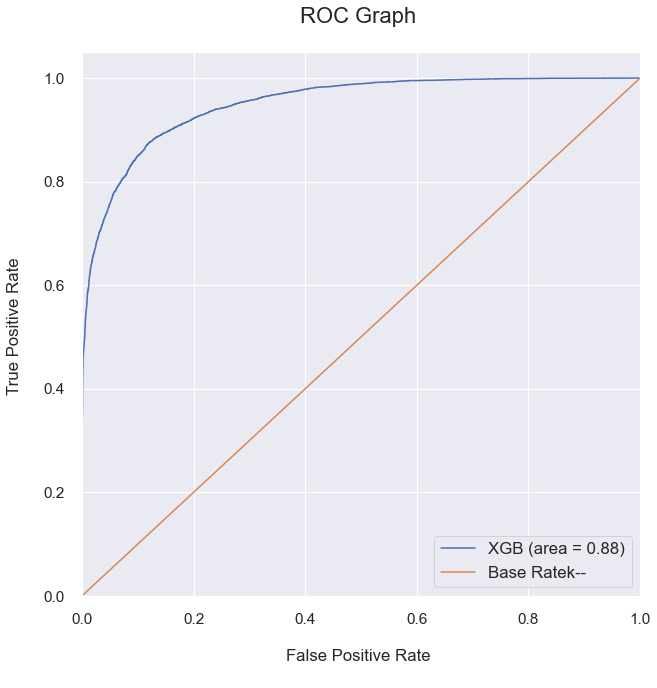

Run Time 3.4382736682891846
Accuracy: 0.880061561322507


In [104]:
start_time = time()
xgb_grid2.fit(X_train, y_train)
run_time = time() - start_time 
# Predicting the Test set results 
y_pred = xgb_grid2.predict(X_test)
probs = xgb_grid2.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, xgb_grid2.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 10))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label = 'XGB (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc = "lower right", fontsize = "medium")
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.yticks(rotation = 0, horizontalalignment = "right")



plt.show()

print("Run Time", run_time)
print("Accuracy:", accuracy_score(y_test, y_pred))

<Figure size 2016x1440 with 0 Axes>

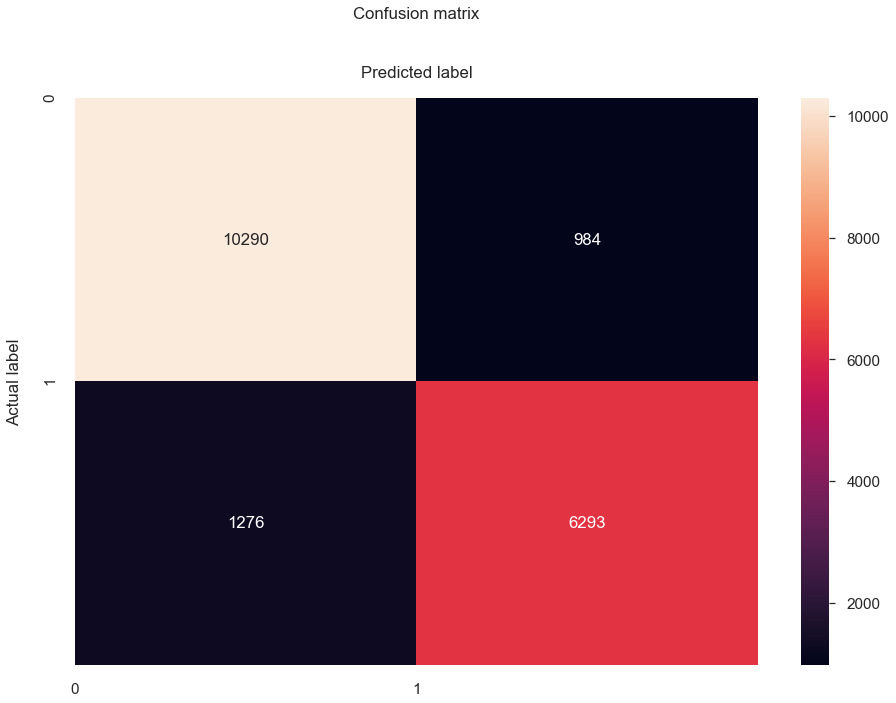

In [105]:
#Visualize results on a Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
accuracy = accuracy_score(y_test, y_pred)

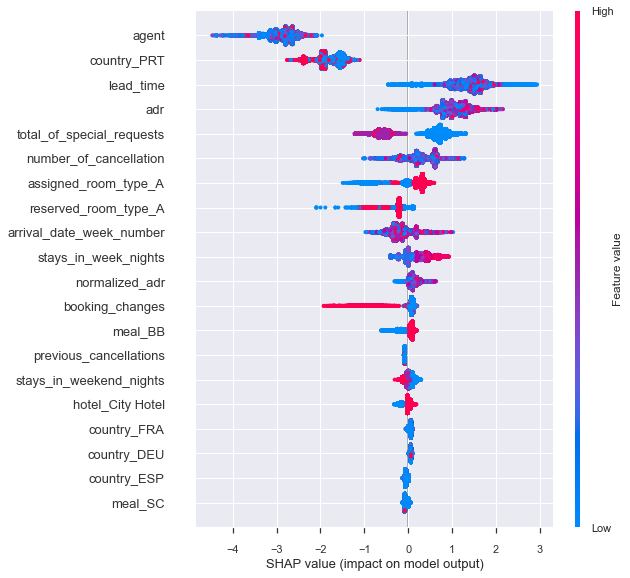

In [106]:
explainer = shap.TreeExplainer(xgb_grid2)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, features = X, feature_names = X.columns)

# Conclusions
<style>
table {
border-collapse:collapse;
align : center
}
td, th {
border:1px solid #ddd;
padding:8px;
}
</style>

<p> It was decided to use XTreme Gradient Boosting from the start given the best performance both in terms of efficiency and effectiveness. <br>
From here it was decided to perform two GridSearch to search for the best hyperparameters of the model <br>
Below a table with the final results and the plot of the best model <br>
<table>
<tr><td>Model</td><td>Accuracy</td><td> Run Time</td></tr>
<tr><td> Base XGB </td><td>0.87</td><td>4 secs </td></tr>
<tr><td> XGB GridSearch 1 </td><td>0.893</td><td> 2.8 secs </td></tr>
<tr><td> XGB GridSearch 2 </td><td>0.891</td><td>3.1 secs </td></tr>
</table>
</p>

## Neural Networks

In [ ]:
model = Sequential()
model.add(Flatten(input_dim = 223))
model.add(Dense(200, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(200, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(200, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
# Compile model
#opt = keras.optimizer.SGD(lr=0.01, momentum=0.9)
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['binary_accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])

In [ ]:
model.evaluate(X_test, y_test, verbose = 1)

In [107]:
df.dtypes

datetime                  datetime64[ns]
number_of_cancellation             int64
is_canceled                        int64
adr                              float64
adults                             int64
                               ...      
reserved_room_type_E               uint8
reserved_room_type_F               uint8
reserved_room_type_G               uint8
reserved_room_type_H               uint8
reserved_room_type_L               uint8
Length: 220, dtype: object